Keys in 'map_nilson':
jumpIndex
jumpNumber
instanceChannels_128
instanceChannels_1024
instanceNumbers
electrodeNumbers
arrayNumbers
stimChannels
stimNumbers
cereM_banks
stimBanks
cereM_banks_number
stimBanks_number
electrodeXYPositions
arrayColor
alphaValue
RFX
RFY
STDX
STDY
R2
Minimum R2 value excluding NaNs: 0.51


C:\Users\Radovan\AppData\Local\Temp\ipykernel_17264\3570847888.py:122: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(horizontal_pos_MaxResponses_mean[i] + xOffset,
C:\Users\Radovan\AppData\Local\Temp\ipykernel_17264\3570847888.py:200: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(horizontal_pos_MaxResponses_mean[i] + xOffset,


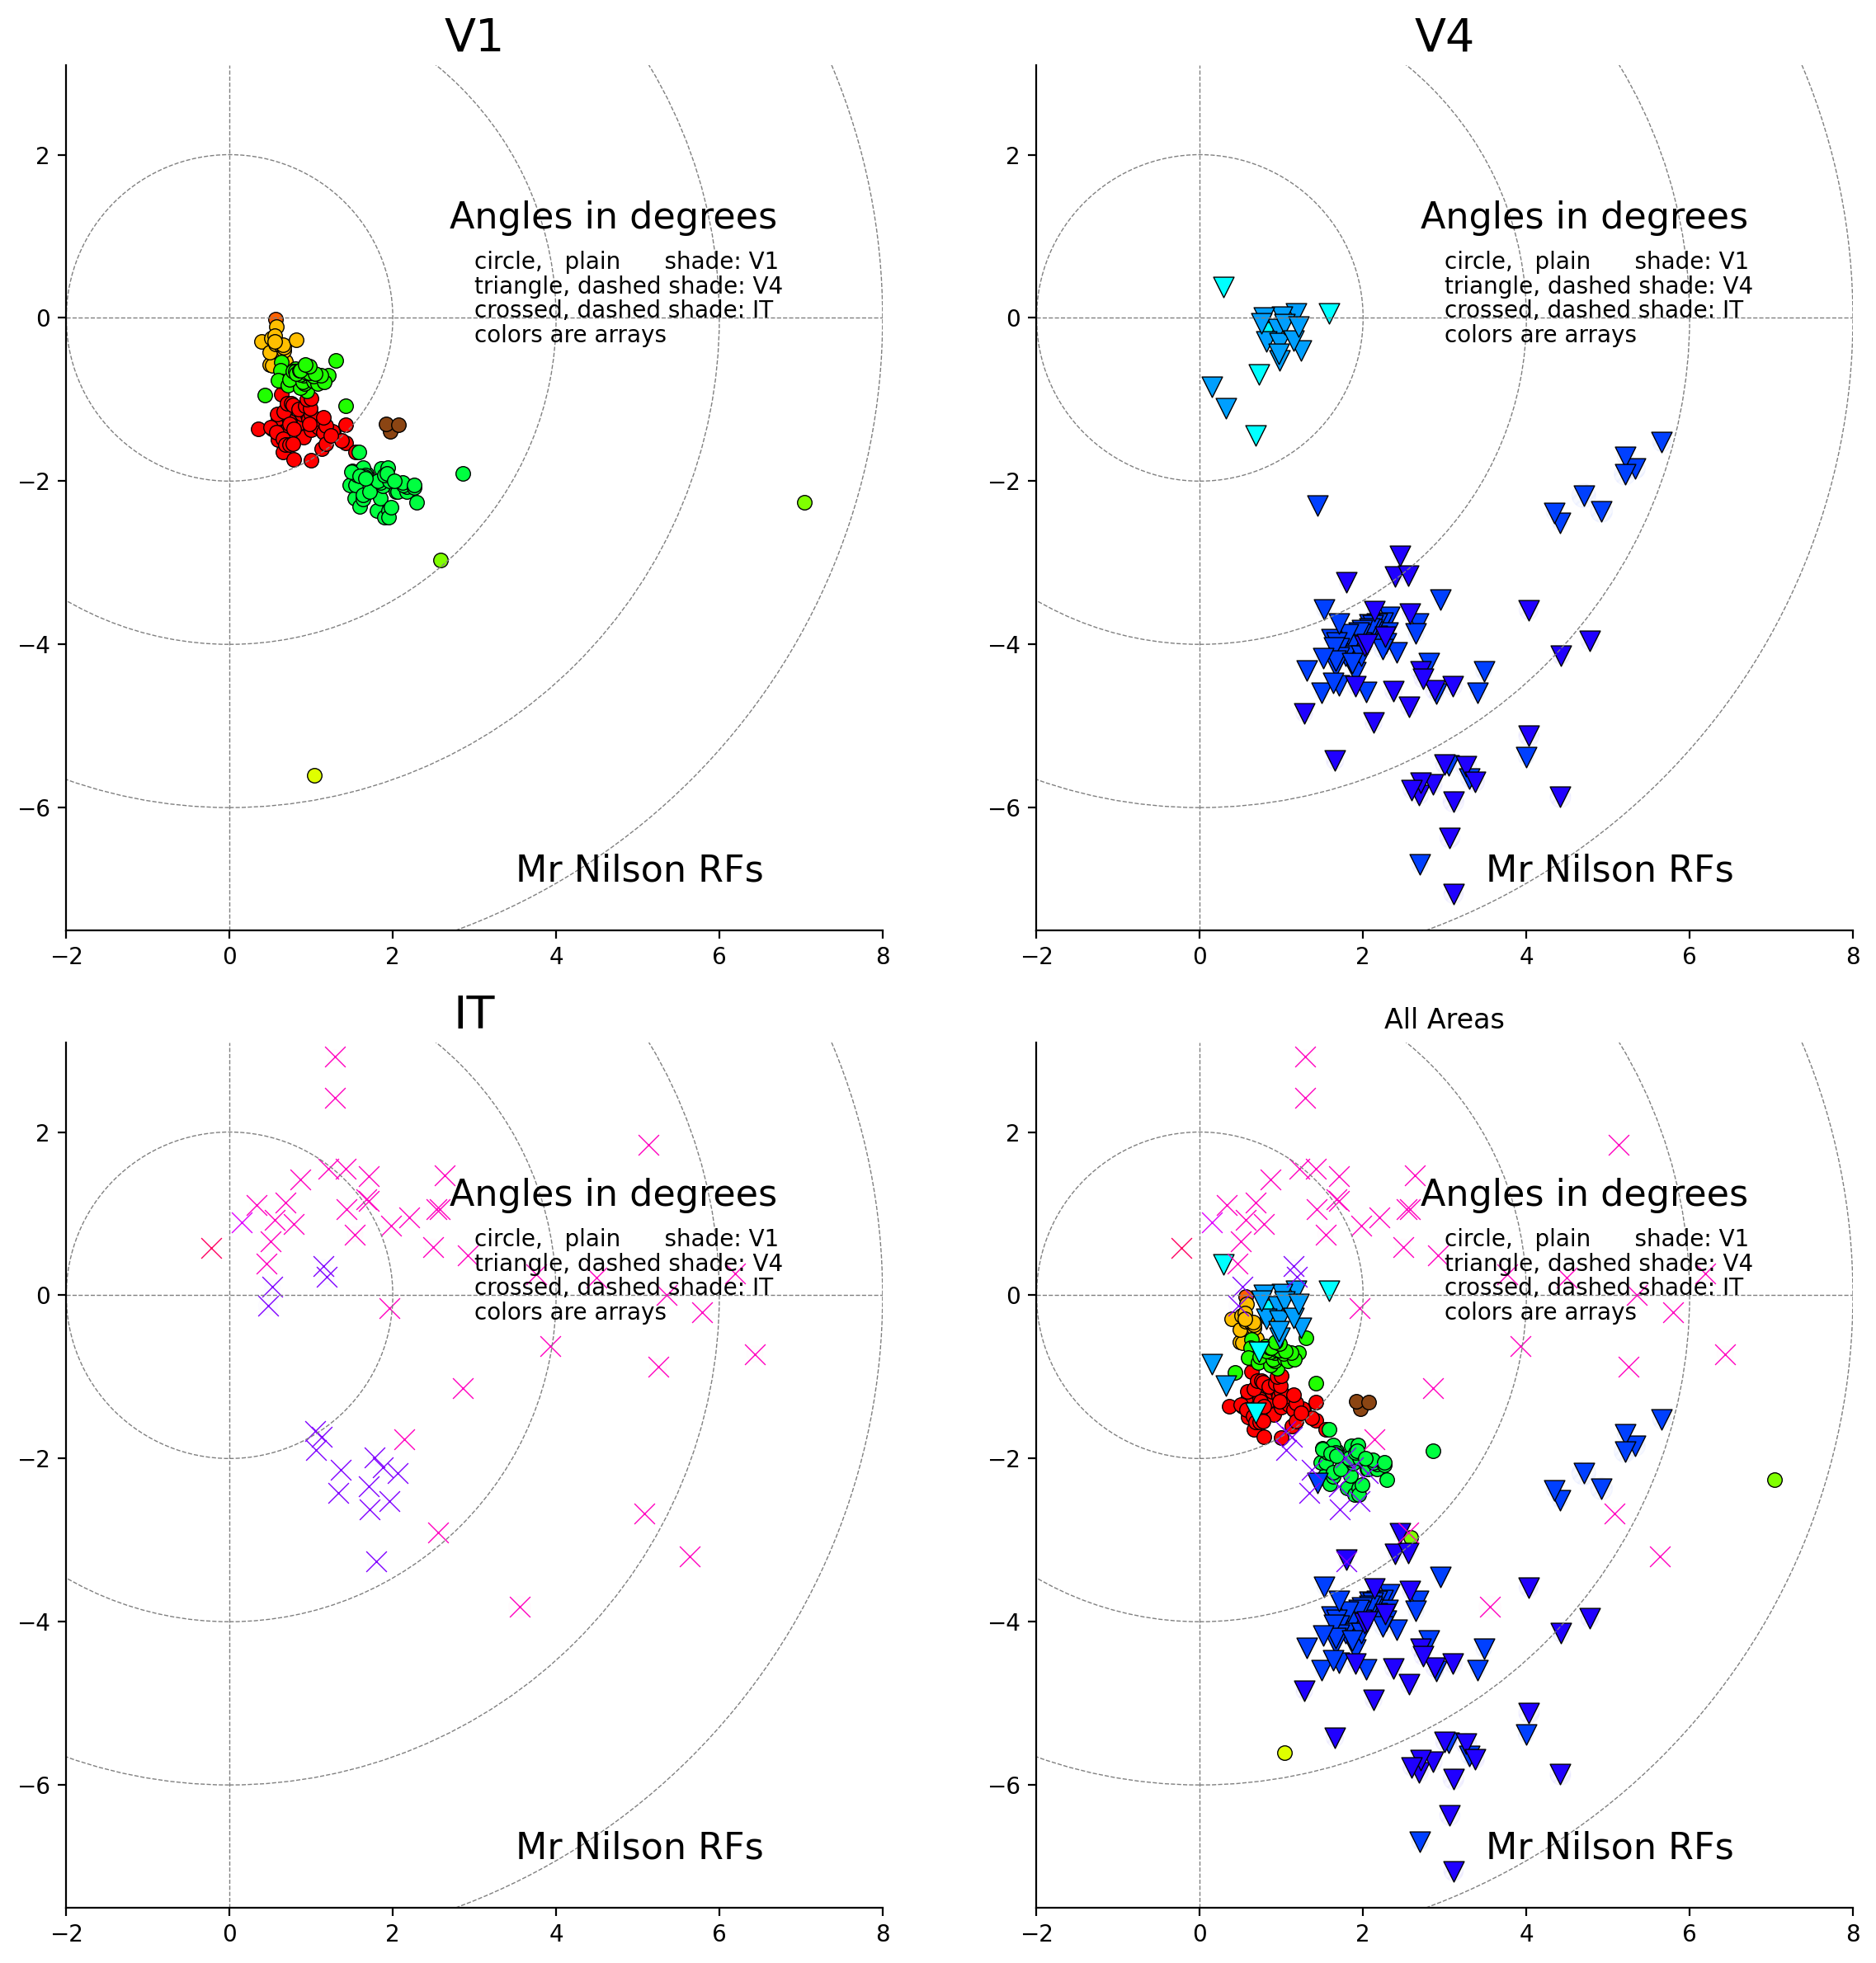

Minimum R2 value excluding NaNs: 0.51


KeyError: 'RFX_predicted'

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 20 11:41:00 2024

@author: Lozano



--- Description ---

mapping.pkl contain a mapping dictionary, between channels and everything else,
such as electrodes, cereplex M banks, cortical positions and RFs.

The contents within the dictionary keys, their types and and shapes are:
    

--- HW mapping ---
jumpIndex: NumPy Array, Shape: (1024,) # 
jumpNumber: NumPy Array, Shape: (1024,)
instanceChannels_128: NumPy Array, Shape: (1024,) # 
instanceChannels_1024: NumPy Array, Shape: (1024,)
instanceNumbers: NumPy Array, Shape: (1024,)
electrodeNumbers: NumPy Array, Shape: (1024,) # 1-64 per array
arrayNumbers: NumPy Array, Shape: (1024,)
stimChannels: NumPy Array, Shape: (1024,) # indexing mismatch to electrodes
stimNumbers: NumPy Array, Shape: (1024,)
cereM_banks: (Data type and content size not specified)
stimBanks: (Data type and content size not specified)
cereM_banks_number: List, Length: 1024
stimBanks_number: List, Length: 1024


--- Cortex mapping ---
electrodeXYPositions: NumPy Array, Shape: (1024, 2) # in reference to cortical picture
arrayColor: NumPy Array, Shape: (1024, 3) # RGB
alphaValue: NumPy Array, Shape: (1024,)


--- RF mapping ---
RFX: NumPy Array, Shape: (1024,) - X coordinates of receptive fields.
RFY: NumPy Array, Shape: (1024,) - Y coordinates of receptive fields.
STDX: NumPy Array, Shape: (1024,) - Standard deviation in X direction of receptive fields.
STDY: NumPy Array, Shape: (1024,) - Standard deviation in Y direction of receptive fields.
R2: NumPy Array, Shape: (1024,) - R² values indicating the fit quality of receptive field estimates.

The RF values come from combining data from 1. moving bars (for estimating V1 RFs) and 2. sparse noise (for estimating V4 and IT RFs)


"""

#%% Imports and folder change
import os
import numpy as np
import scipy.io
import pickle
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

# %matplotlib inline
rootpath = r"C:\Users\Radovan\OneDrive\Radboud\a_Internship\Antonio Lonzano\root\SlavsForSight\code\NIN_canon\MAPPING"

os.chdir(rootpath)

#%% Function definition

def plot_all_RFs(horizontal_pos_MaxResponses_mean, vertical_pos_MaxResponses_mean, sizes, goodIDs, allColors, markerSize, offSet, text = False):
    AREA = ['V1'] * (64 * 8) + ['V4'] * (64 * 4) + ['IT'] * (64 * 4)
    
    # textOffset = 0.5
    stdCoeff = 1
    xOffset = offSet[0]
    yOffset = offSet[1]
    
    # Create subplots for each area
    fig, axs = plt.subplots(2, 2, figsize=(12, 12), dpi=200)
    
    # Iterate over the areas
    for area, ax in zip(['V1', 'V4', 'IT'], axs.flatten()):
        ax.set_title(area, size = 20)  # Set the subplot title
        
        #### ellipses RFs
        for i in range(1024):
            if goodIDs[i] and AREA[i] == area:
                if area == 'V1':
                    hatch = None
                    alpha = 0.3
                elif area == 'V4':
                    hatch = '//////'
                    alpha = 0.03
                elif area == 'IT':
                    hatch = '///'
                    alpha = 0.01

                color = tuple(allColors[i])
                ellipse = patches.Ellipse((horizontal_pos_MaxResponses_mean[i] + xOffset, vertical_pos_MaxResponses_mean[i] + yOffset),
                                          width=sizes[i] * stdCoeff,
                                          height=sizes[i] * stdCoeff,
                                          edgecolor=color, linewidth=0.5,
                                          hatch=hatch,
                                          facecolor=color,
                                          alpha=alpha)
                ax.add_patch(ellipse)
        
        #### centers RFs
        for i in range(1024):
            if AREA[i] == area:
                if area == 'V1':
                    marker = 'o'
                    s = 5 * markerSize
                elif area == 'V4':
                    marker = 'v'
                    s = 10 * markerSize
                elif area == 'IT':
                    marker = 'x'
                    s = 10 * markerSize
        
                if goodIDs[i]:
                    color = tuple(allColors[i])
                    ax.scatter(horizontal_pos_MaxResponses_mean[i] + xOffset, 
                               vertical_pos_MaxResponses_mean[i] + yOffset, 
                               color=color,
                               marker=marker,
                               edgecolors='black',
                               linewidth=0.5,
                               s=s)
                    if text:
                        ax.annotate(str(i + 1),
                                    (horizontal_pos_MaxResponses_mean[i] + textOffset + xOffset, 
                                     vertical_pos_MaxResponses_mean[i] + textOffset + yOffset),
                                    size=4)
        
        # Concentric circles
        center = (0, 0)  # Center coordinates of the circles
        radius = 8  # Radius of the outermost circle
        num_circles = 4  # Number of concentric circles to draw
        
        for angle in range(num_circles):
            circle = patches.Circle(center, radius * (angle + 1) / num_circles, edgecolor='gray', linewidth=0.5,
                                    fill=False, linestyle='dashed')
            ax.add_patch(circle)
        
        textYstart = 1.1
        textXstart = 3
        ax.annotate('Angles in degrees', (textXstart - 0.3, textYstart), size=16)
        ax.annotate('circle,   plain      shade: V1', (textXstart, textYstart - 0.5), size=10)
        ax.annotate('triangle, dashed shade: V4', (textXstart, textYstart - 0.8), size=10)
        ax.annotate('crossed, dashed shade: IT', (textXstart, textYstart - 1.1), size=10)
        ax.annotate('colors are arrays', (textXstart, textYstart - 1.4), size=10)
        ax.annotate('Mr Nilson RFs', (textXstart + 0.5, -6.9), size=16)
        
        # Dashed lines at (0, 0)
        ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
        ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
        # ax.set_xlim(-1, 7)
        ax.set_xlim(-2, 8)
        ax.set_ylim(-7.5, 3.1)
        ax.set_aspect('equal')  # Set equal aspect ratio
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Plot all areas together in the fourth subplot
    ax = axs[1, 1]
    ax.set_title('All Areas')
    
    for i in range(1024):
        if goodIDs[i]:
            if AREA[i] == 'V1':
                hatch = None
                alpha = 0.3
            elif AREA[i] == 'V4':
                hatch = '//////'
                alpha = 0.03
            elif AREA[i] == 'IT':
                hatch = '///'
                alpha = 0.01
    
            color = tuple(allColors[i])
            ellipse = patches.Ellipse((horizontal_pos_MaxResponses_mean[i] + xOffset, vertical_pos_MaxResponses_mean[i] + yOffset),
                                      width=sizes[i] * stdCoeff,
                                      height=sizes[i] * stdCoeff,
                                      edgecolor=color, linewidth=0.5,
                                      hatch=hatch,
                                      facecolor=color,
                                      alpha=alpha)
            ax.add_patch(ellipse)
    
            if AREA[i] == 'V1':
                marker = 'o'
                s = 5 * markerSize
            elif AREA[i] == 'V4':
                marker = 'v'
                s = 10* markerSize
            elif AREA[i] == 'IT':
                marker = 'x'
                s = 10 * markerSize
    
            ax.scatter(horizontal_pos_MaxResponses_mean[i] + xOffset,
                       vertical_pos_MaxResponses_mean[i] + yOffset,
                       color=color,
                       marker=marker,
                       edgecolors='black',
                       linewidth=0.5,
                       s=s)
            if text:
                ax.annotate(str(i + 1),
                            (horizontal_pos_MaxResponses_mean[i] + offset + xOffset,
                             vertical_pos_MaxResponses_mean[i] + offset + yOffset),
                            size=4)
    
    # Concentric circles
    for angle in range(num_circles):
        circle = patches.Circle(center, radius * (angle + 1) / num_circles, edgecolor='gray', linewidth=0.5,
                                fill=False, linestyle='dashed')
        ax.add_patch(circle)

    ax.annotate('Angles in degrees', (textXstart - 0.3, textYstart), size=16)
    ax.annotate('circle,   plain      shade: V1', (textXstart, textYstart - 0.5), size=10)
    ax.annotate('triangle, dashed shade: V4', (textXstart, textYstart - 0.8), size=10)
    ax.annotate('crossed, dashed shade: IT', (textXstart, textYstart - 1.1), size=10)
    ax.annotate('colors are arrays', (textXstart, textYstart - 1.4), size=10)
    ax.annotate('Mr Nilson RFs', (textXstart + 0.5, -6.9), size=16)
    ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
    ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.set_xlim(-1, 7)
    ax.set_xlim(-2, 8)

    ax.set_ylim(-7.5, 3.1)
    ax.set_aspect('equal')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the figure
    plt.show()

#%% Loading the mapping dictionary

# Define the path to the 'mapping.kl' file within the 'results' folder
#rootpath = r"\\vs03\VS03-VandC-INTENSE2\mind_writing\data_analysis\MAPPING"  # Ensure this is your correct rootpath
mapping_file_path = os.path.join(rootpath, 'results', 'mapping_MrNilson.pkl')

with open(mapping_file_path, 'rb') as file:
    map_nilson = pickle.load(file)
print("Keys in 'map_nilson':")
for key in map_nilson.keys():
    print(key)
    
#%% Plotting the RFs (you can use your own function)

min_R2_without_nans = np.nanmin(map_nilson['R2'])
print(f"Minimum R2 value excluding NaNs: {min_R2_without_nans}")

# Define the R2 threshold
R2_THRESHOLD = 0.6

# Calculate goodIDs based on NaN presence in RF data and R2 criteria
goodIDs = (~np.isnan(map_nilson['RFX']) &
           ~np.isnan(map_nilson['RFY']) &
           (map_nilson['R2'] >= R2_THRESHOLD))

# for THINGS_RF1 which do not has R2 for some reason
goodIDs = (~np.isnan(map_nilson['RFX']))


# when the data comes from MATT (see mapping.py)
goodIDs = (~np.isnan(   map_nilson['STDY'] )   )


horizontal_pos_MaxResponses_mean = map_nilson['RFX']
vertical_pos_MaxResponses_mean = map_nilson['RFY']

# sizes = (map_nilson['STDX'] + map_nilson['STDY']) / 2  # Example way to compute sizes
sizes = (map_nilson['STDX'] + map_nilson['STDY']) / 2  # Adapted for RF THINGS 1
sizes = (map_nilson['STDX'] + map_nilson['STDY']) / 25  # Adapted for RF Matt


allColors = map_nilson['arrayColor']  # Assuming this is the correct format for colors
markerSize = 8
offSet = [0, 0]  # Adjust if necessary

plot_all_RFs(
    horizontal_pos_MaxResponses_mean,
    vertical_pos_MaxResponses_mean,
    sizes,
    goodIDs,
    allColors,
    markerSize,
    offSet,
    text=False  # Set to True if you want text annotations
)

#%% Plotting the PREDICTED RFs (you can use your own function)

min_R2_without_nans = np.nanmin(map_nilson['R2'])
print(f"Minimum R2 value excluding NaNs: {min_R2_without_nans}")

# Define the R2 threshold
R2_THRESHOLD = 0.6

# Calculate goodIDs based on NaN presence in RF data and R2 criteria
goodIDs = (~np.isnan(map_nilson['RFX']) &
           ~np.isnan(map_nilson['RFY']) &
           (map_nilson['R2'] >= R2_THRESHOLD))


goodIDs = np.ones((1024,))
# for THINGS_RF1 which do not has R2 for some reason
# goodIDs = (~np.isnan(map_nilson['RFX']))

# not relavnt now 
horizontal_pos_MaxResponses_mean = map_nilson['RFX_predicted']
vertical_pos_MaxResponses_mean = map_nilson['RFY_predicted']

# sizes = (map_nilson['STDX'] + map_nilson['STDY']) / 2  # Example way to compute sizes
sizes = (map_nilson['STDX'] + map_nilson['STDY']) / 2  # Adapted for RF THINGS 1
sizes = np.ones((1024,))  # Adapted for RF THINGS 1


allColors = map_nilson['arrayColor']  # Assuming this is the correct format for colors
markerSize = 8
offSet = [0, 0]  # Adjust if necessary

plot_all_RFs(
    horizontal_pos_MaxResponses_mean,
    vertical_pos_MaxResponses_mean,
    sizes,
    goodIDs,
    allColors,
    markerSize,
    offSet,
    text=False  # Set to True if you want text annotations
)

#%% plot cortical locations with array colors

# change to qt if needed
# %matplotlib inline

label_key = 'arrayNumbers'  # Choose the key for labeling; options include 'channelNumbers', 'electrodeNumbers', etc.
# label_key = 'instanceChannels_1024'  # Choose the key for labeling; options include 'channelNumbers', 'electrodeNumbers', etc.
plot_text = False  # Set to False if you don't want text annotations

# Extract necessary data from map_nilson
R2_values = map_nilson['R2']
electrode_positions = map_nilson['electrodeXYPositions']
array_colors = map_nilson['arrayColor']
alpha_values = map_nilson['alphaValue']
alpha_values = np.where(alpha_values == 0.8, 1, alpha_values) # we dont need to have one alpha value per bank here
label_values = map_nilson[label_key] if label_key in map_nilson else None


# Adjust alpha values based on R2_values or another relevant metric
for i in range(len(R2_values)):
    if np.isnan(R2_values[i]):  # Assuming R2_values is intended for NaN check
        alpha_values[i] = 0.1
        
plt.figure(dpi=200)
ax = plt.gca()

for i, (x, y) in enumerate(electrode_positions):
    color = array_colors[i]
    alpha = alpha_values[i]  # Ensure alpha values are used correctly
    # Plot the cortical location with alpha applied
    ax.scatter(x, -y, color=color, alpha=alpha, s=30, edgecolor='black')

    if plot_text and label_values is not None:
        label = label_values[i]
        # Annotate the point with its label
        ax.text(x, -y, str(label), color='black', fontsize=5, ha='center', va='center')

# Calculate centroids for each array
unique_arrays = np.unique(map_nilson['arrayNumbers'])
centroids = {array_num: [np.mean(electrode_positions[map_nilson['arrayNumbers'] == array_num, 0]),
                         np.mean(electrode_positions[map_nilson['arrayNumbers'] == array_num, 1])]
             for array_num in unique_arrays}

# Plot centroids as large text
for array_num, (x_centroid, y_centroid) in centroids.items():
    text = ax.text(x_centroid, -y_centroid - 30, str(array_num), color='white', fontsize=15, ha='center', va='center', fontweight='bold')
    # Apply path effects to create an outline effect
    text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])

title = f'Cortical Locations with {label_key.capitalize()} Labels' if label_values is not None else "Cortical Locations"
plt.title(title)
plt.xlabel('Cortical X Position')
plt.ylabel('Cortical Y Position')
ax.axis('equal')
plt.tight_layout()
plt.show()

#%% plot cortical locations with RF eccentricity or polar angle values (as a check)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.cm as cm
from matplotlib.colors import Normalize

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Assuming map_nilson and other variables are predefined and contain necessary data
# color_option = 'eccentricity' or 'angle'
color_option = 'eccentricity' 

rfx = map_nilson['RFX_predicted']
rfy = map_nilson['RFY_predicted']

# rfx = map_nilson['RFX']
# rfy = map_nilson['RFY']


eccentricity = np.sqrt(rfx**2 + rfy**2)
angle = np.degrees(np.arctan2(rfy, rfx))

# Selecting the colormap based on the coloring option
if color_option == 'eccentricity':
    data_for_color = eccentricity
    # cmap = cm.plasma  # or cm.coolwarm, cm.seismic for different color palettes
    cmap = cm.seismic  # or cm.coolwarm, cm.seismic for different color palettes
    # cmap = cm.gray  # or cm.coolwarm, cm.seismic for different color palettes
    # cmap = cm.viridis  # or cm.coolwarm, cm.seismic for different color palettes
else:
    data_for_color = angle
    cmap = cm.hsv  # Good for cyclical data like angles

# Setting colorbar range
# vmin, vmax = np.nanmin(eccentricity), np.nanmax(eccentricity)  # Defining visual limits for colorbar
vmin, vmax = 0,7  # Defining visual limits for colorbar

# Normalizing data_for_color to [0, 1] for color mapping within specified range
norm = Normalize(vmin=vmin, vmax=vmax)

plt.figure(dpi=200)
ax = plt.gca()

for i, (x, y) in enumerate(map_nilson['electrodeXYPositions']):
    if np.isnan(data_for_color[i]):
        color = 'gray'
        alpha = 0.1  # Reduced opacity for electrodes without valid data
    else:
        # Normalize the data value to [0, 1] within vmin to vmax range
        color = cmap(norm(data_for_color[i]))
        alpha = 1

    ax.scatter(x, -y, color=color, alpha=alpha, s=30, edgecolor='black')


# Calculate centroids for each array
unique_arrays = np.unique(map_nilson['arrayNumbers'])
centroids = {array_num: [np.mean(electrode_positions[map_nilson['arrayNumbers'] == array_num, 0]),
                         np.mean(electrode_positions[map_nilson['arrayNumbers'] == array_num, 1])]
             for array_num in unique_arrays}

# Plot centroids as large text
for array_num, (x_centroid, y_centroid) in centroids.items():
    text = ax.text(x_centroid, -y_centroid - 30, str(array_num), color='white', fontsize=15, ha='center', va='center', fontweight='bold')
    # Apply path effects to create an outline effect
    text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])


# Adding a colorbar that accurately represents the data
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This line may be optional depending on the matplotlib version

cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar_label = 'RF Eccentricity' if color_option == 'eccentricity' else 'RF Angle (rad)'
cbar.set_label(cbar_label)

plt.title(f"Cortical Locations Colored by {cbar_label}")
plt.xlabel('Cortical X Position')
plt.ylabel('Cortical Y Position')
# ax.axis('equal')

plt.tight_layout()
plt.show()


#%% Extra info

# Here's how you generate a vector that tells the area for each of the channel numbers, 
# from 1 to 1024. It can be useful to select channels from the area you want.
AREA = ['V1'] * (64 * 8) + ['V4'] * (64 * 4) + ['IT'] * (64 * 4)





In [2]:
print("Keys in 'map_nilson':")
for key in map_nilson.keys():
    print(key)

Keys in 'map_nilson':
jumpIndex
jumpNumber
instanceChannels_128
instanceChannels_1024
instanceNumbers
electrodeNumbers
arrayNumbers
stimChannels
stimNumbers
cereM_banks
stimBanks
cereM_banks_number
stimBanks_number
electrodeXYPositions
arrayColor
alphaValue
RFX
RFY
STDX
STDY
R2
